In [1]:
%%capture
!wget https://raw.githubusercontent.com/shitkov/signature_detector/main/yolo_v5s_640p_1k.pt
!wget https://raw.githubusercontent.com/shitkov/signature_detector/main/test.jpg
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

In [2]:
import numpy as np
import torch
import PIL
from PIL import Image, ImageDraw

In [3]:
model_path = '/content/yolo_v5s_640p_1k.pt'
yolo_path = '/content/yolov5'
img_path = '/content/test.jpg'

In [4]:
model = torch.hub.load(yolo_path, 'custom', path=model_path, source='local')

requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 v5.0-373-g6dd7dd8 torch 1.9.0+cu102 CPU




requirements: 1 package updated per /content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPs
Adding AutoShape... 


In [5]:
imgs = [img_path]

In [6]:
results = model(imgs)

In [7]:
qnt = np.array(results.xyxy[0].shape)[0]

In [8]:
print('Signatures: ', qnt)

Signatures:  1


In [9]:
def draw_line(image, coord):
    draw = ImageDraw.Draw(image)
    draw.line((coord[0], coord[1], coord[0], coord[3]), fill=(255, 0, 0), width=5)
    draw.line((coord[0], coord[3], coord[2], coord[3]), fill=(255, 0, 0), width=5)
    draw.line((coord[2], coord[3], coord[2], coord[1]), fill=(255, 0, 0), width=5)
    draw.line((coord[2], coord[1], coord[0], coord[1]), fill=(255, 0, 0), width=5)
    return image

In [10]:
for r in np.array(results.xyxy[0].cpu()):
    coordinates = (tuple([int(i) for i in r[:4]]))
    image = Image.open(img_path).convert('RGB')
    image = draw_line(image, coordinates)

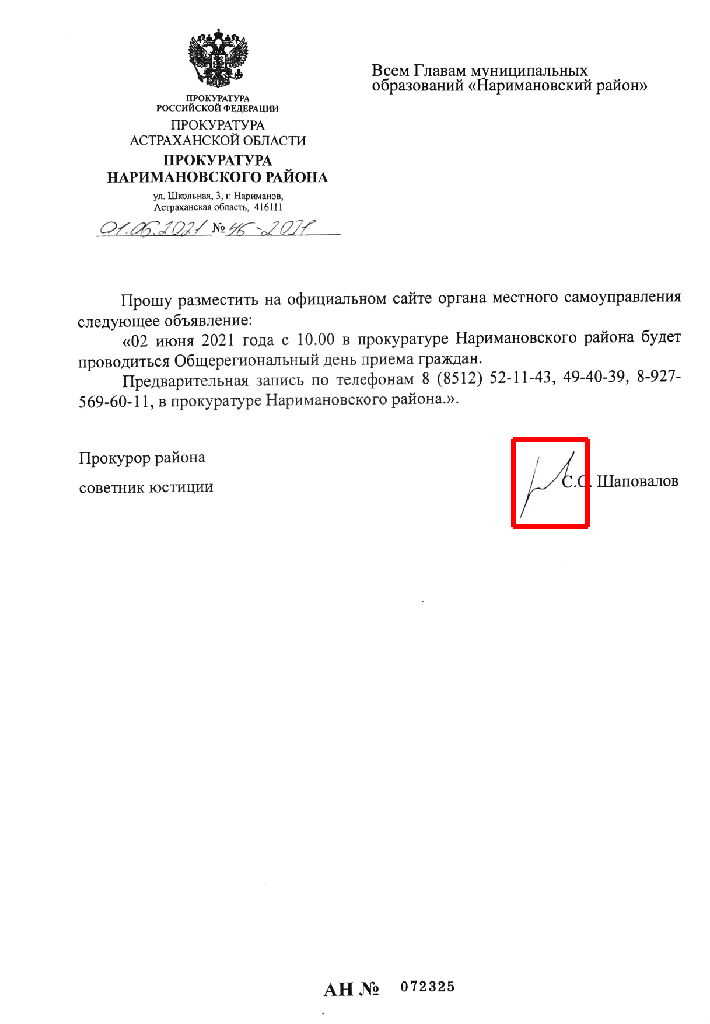

In [11]:
image